In [24]:
import pandas as pd
import pytz as tz


In [30]:
df = pd.read_csv('data/2023-09-14.csv')
df['five_min'] = pd.to_datetime(df['five_min'], utc=True)
df['five_min'] = df['five_min'].dt.tz_convert(tz='Europe/Oslo')
df.drop('min', axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype                      
---  ------     --------------  -----                      
 0   five_min   53 non-null     datetime64[ns, Europe/Oslo]
 1   direction  53 non-null     object                     
 2   cnt        53 non-null     int64                      
dtypes: datetime64[ns, Europe/Oslo](1), int64(1), object(1)
memory usage: 1.4+ KB


<AxesSubplot: xlabel='five_min'>

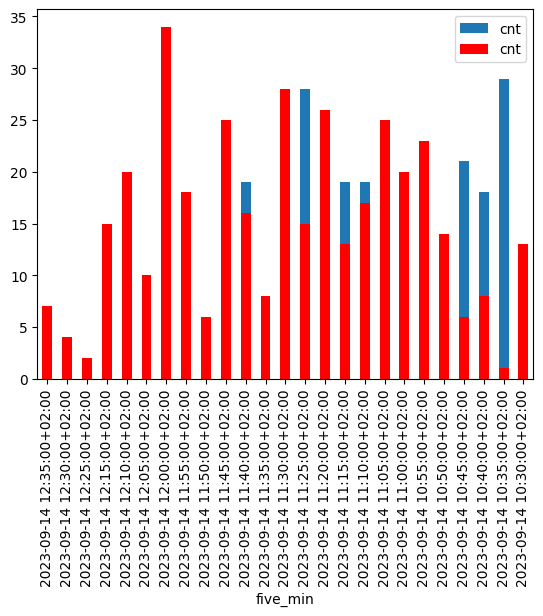

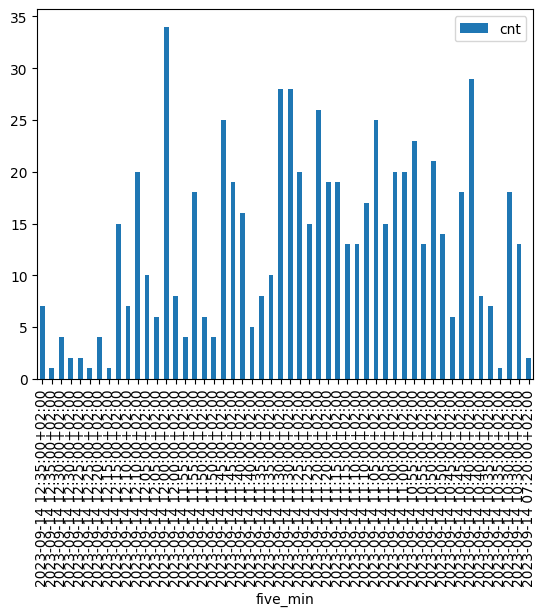

In [32]:
ax = df[df.direction == 'IN'].set_index('five_min')[:-1].plot(kind='bar')
df[df.direction == 'OUT'].set_index('five_min')[:-1].plot(ax=ax, color='red', kind='bar')
df.set_index('five_min')[:-1].plot(kind='bar')

<AxesSubplot: xlabel='five_min'>

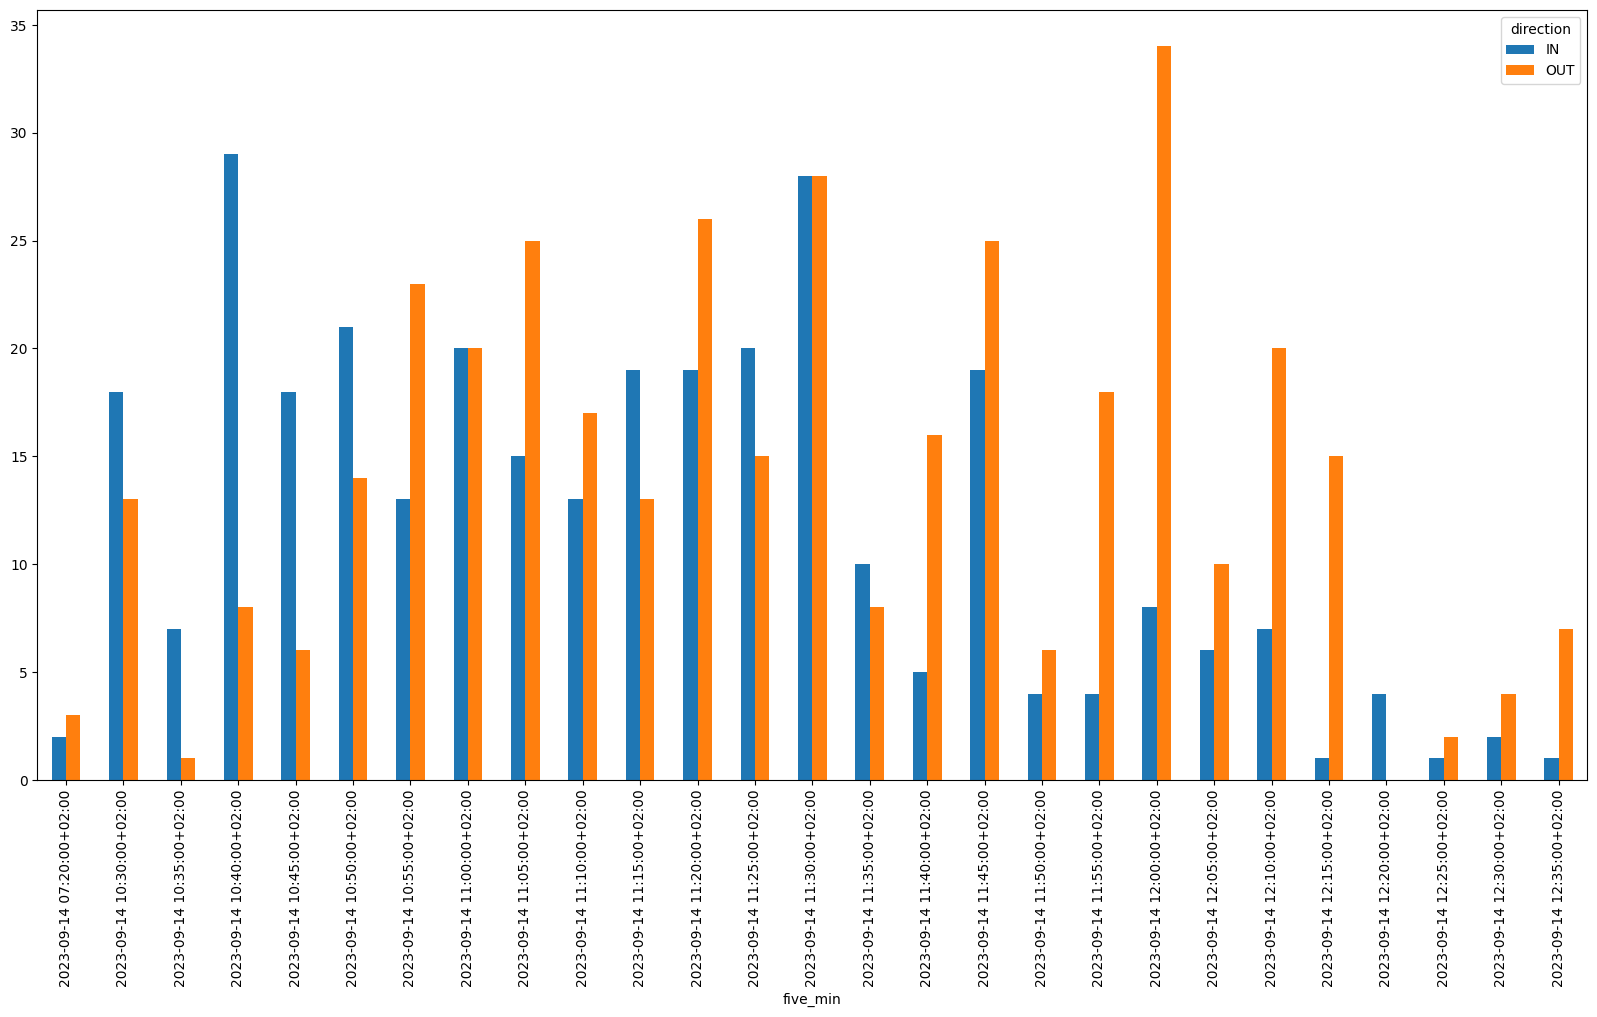

In [37]:
df.pivot_table(index='five_min', columns='direction', values='cnt').plot(kind='bar', figsize=(20, 10))